# EDA: Social Media Viral Content & Engagement Metrics

Exploración del conjunto de datos de contenido viral y métricas de engagement en redes sociales.

## 1. Carga de datos y librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('social_media_viral_content_dataset.csv')
df.head(10)

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
5,SM_100005,Instagram,carousel,Sports,hi,Brazil,2024-11-01 00:00:00,#tech #music,6513472,465248,27485,25659,0.0796,-0.907,1
6,SM_100006,X,text,Education,hi,UK,2024-06-09 00:00:00,#tech #ai,65481,2847,194,84655,1.3393,-0.235,0
7,SM_100007,X,text,Technology,es,Pakistan,2024-07-26 00:00:00,#trending #tech #news,2961423,329047,31556,11395,0.1256,0.215,1
8,SM_100008,YouTube Shorts,text,Sports,es,Pakistan,2024-03-03 00:00:00,#music #tech #news #trending,3916736,489592,14507,87314,0.1510,0.884,1
9,SM_100009,YouTube Shorts,video,Politics,en,US,2024-10-05 00:00:00,#music #trending #ai #viral #news,3116477,239729,8438,43002,0.0934,-0.968,1


## 2. Estructura y tipos de datos

In [3]:
print('Dimensiones:', df.shape)
print('\nColumnas y tipos:')
df.dtypes

Dimensiones: (2000, 15)

Columnas y tipos:


post_id             object
platform            object
content_type        object
topic               object
language            object
region              object
post_datetime       object
hashtags            object
views                int64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
sentiment_score    float64
is_viral             int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


## 3. Valores faltantes

In [5]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
tab = pd.DataFrame({'Faltantes': missing, 'Porcentaje (%)': missing_pct})
tab[missing > 0] if missing.any() else print('No hay valores faltantes.')

No hay valores faltantes.


## 4. Estadísticas descriptivas (numéricas)

In [6]:
df.describe()

,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.284860e+06,245329.244000,24786.929000,49936.981500,0.157852,-0.000566,0.699000
std,3.246193e+06,145032.423582,14433.288364,29012.818697,0.535457,0.574911,0.458807
min,4.380000e+03,292.000000,14.000000,127.000000,0.035700,-1.000000,0.000000
25%,1.652742e+06,118903.750000,12337.750000,25698.750000,0.057975,-0.507000,0.000000
50%,3.469408e+06,239831.000000,24519.500000,50212.000000,0.084500,0.001000,1.000000
75%,6.348078e+06,372323.500000,37116.250000,75433.000000,0.142525,0.495250,1.000000
max,1.437179e+07,499983.000000,49989.000000,99977.000000,12.573200,0.999000,1.000000


In [7]:
numeric_cols = ['views', 'likes', 'comments', 'shares', 'engagement_rate', 'sentiment_score']
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
views,2000.0,4.284860e+06,3.246193e+06,4380.0000,1.652742e+06,3.469408e+06,6.348078e+06,1.437179e+07
likes,2000.0,2.453292e+05,1.450324e+05,292.0000,1.189038e+05,2.398310e+05,3.723235e+05,4.999830e+05
comments,2000.0,2.478693e+04,1.443329e+04,14.0000,1.233775e+04,2.451950e+04,3.711625e+04,4.998900e+04
shares,2000.0,4.993698e+04,2.901282e+04,127.0000,2.569875e+04,5.021200e+04,7.543300e+04,9.997700e+04
engagement_rate,2000.0,1.578519e-01,5.354574e-01,0.0357,5.797500e-02,8.450000e-02,1.425250e-01,1.257320e+01
sentiment_score,2000.0,-5.665000e-04,5.749115e-01,-1.0000,-5.070000e-01,1.000000e-03,4.952500e-01,9.990000e-01


## 5. Variables categóricas

In [8]:
categorical = ['platform', 'content_type', 'topic', 'language', 'region', 'is_viral']
for col in categorical:
    print(f'\n--- {col} ---')
    print(df[col].value_counts())


--- platform ---
platform
Instagram         539
YouTube Shorts    499
X                 485
TikTok            477
Name: count, dtype: int64

--- content_type ---
content_type
carousel    528
image       512
text        488
video       472
Name: count, dtype: int64

--- topic ---
topic
Education        347
Entertainment    345
Politics         332
Technology       331
Sports           330
Lifestyle        315
Name: count, dtype: int64

--- language ---
language
en    420
ur    405
fr    404
hi    392
es    379
Name: count, dtype: int64

--- region ---
region
US          428
India       406
Brazil      402
UK          385
Pakistan    379
Name: count, dtype: int64

--- is_viral ---
is_viral
1    1398
0     602
Name: count, dtype: int64


## 6. Variable objetivo: is_viral

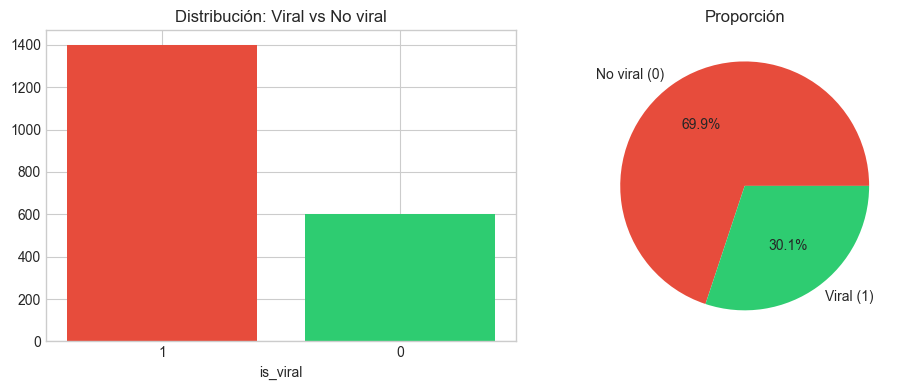

In [9]:
viral_counts = df['is_viral'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(viral_counts.index.astype(str), viral_counts.values, color=['#e74c3c', '#2ecc71'])
ax[0].set_title('Distribución: Viral vs No viral')
ax[0].set_xlabel('is_viral')
ax[1].pie(viral_counts, labels=['No viral (0)', 'Viral (1)'], autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'])
ax[1].set_title('Proporción')
plt.tight_layout()
plt.show()

## 7. Distribuciones de métricas numéricas

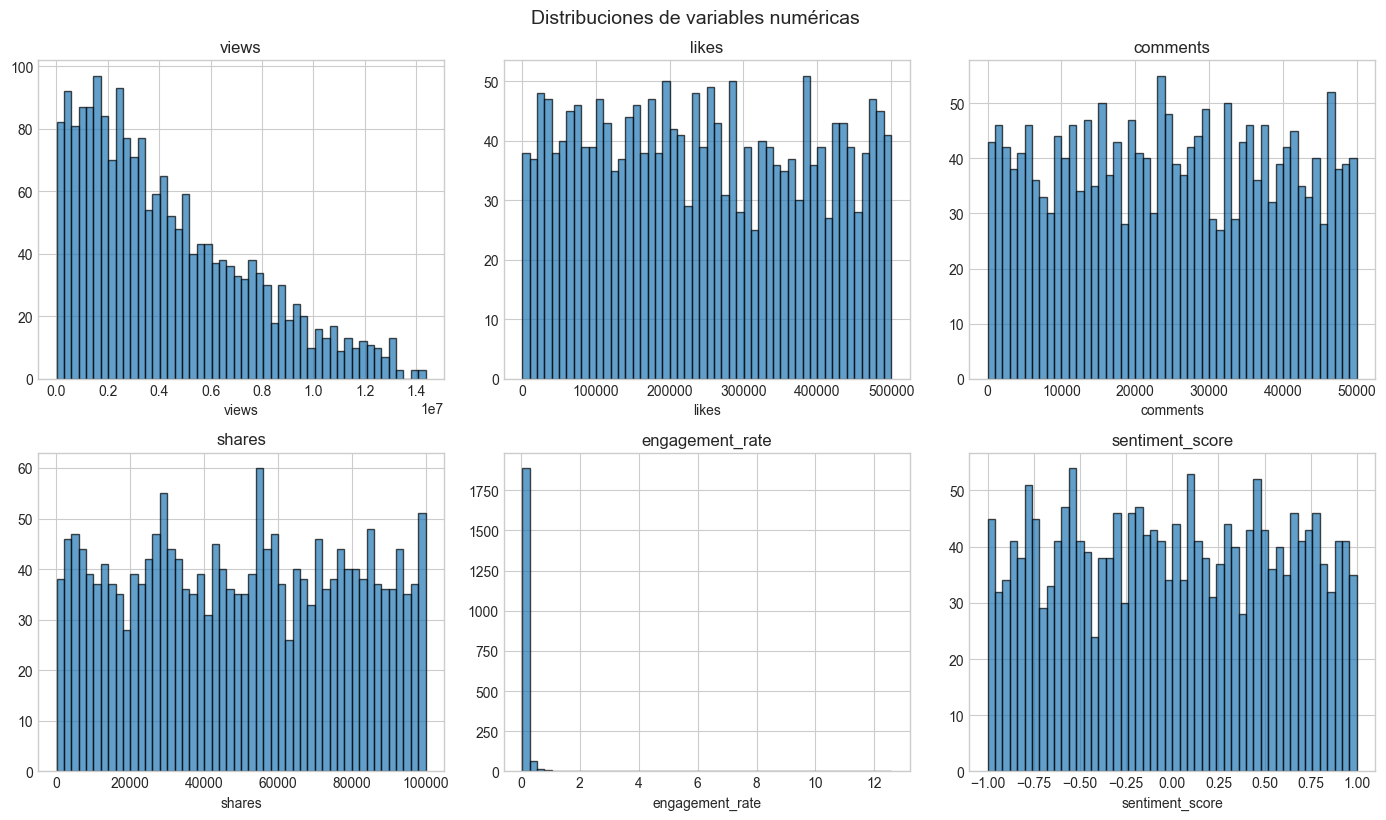

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.suptitle('Distribuciones de variables numéricas', y=1.02, fontsize=14)
plt.show()

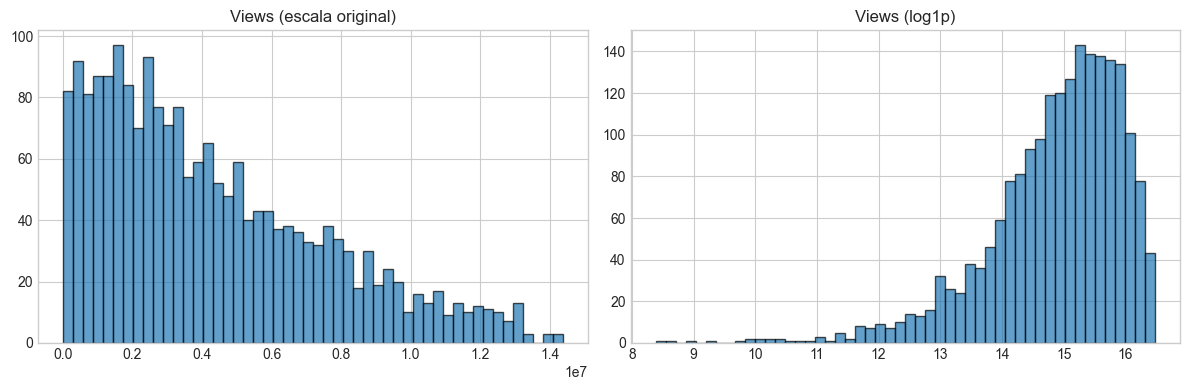

In [11]:
# Escala log para views (suelen ser muy asimétricas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df['views'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Views (escala original)')
axes[1].hist(np.log1p(df['views']), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Views (log1p)')
plt.tight_layout()
plt.show()

## 8. Engagement por plataforma y tipo de contenido

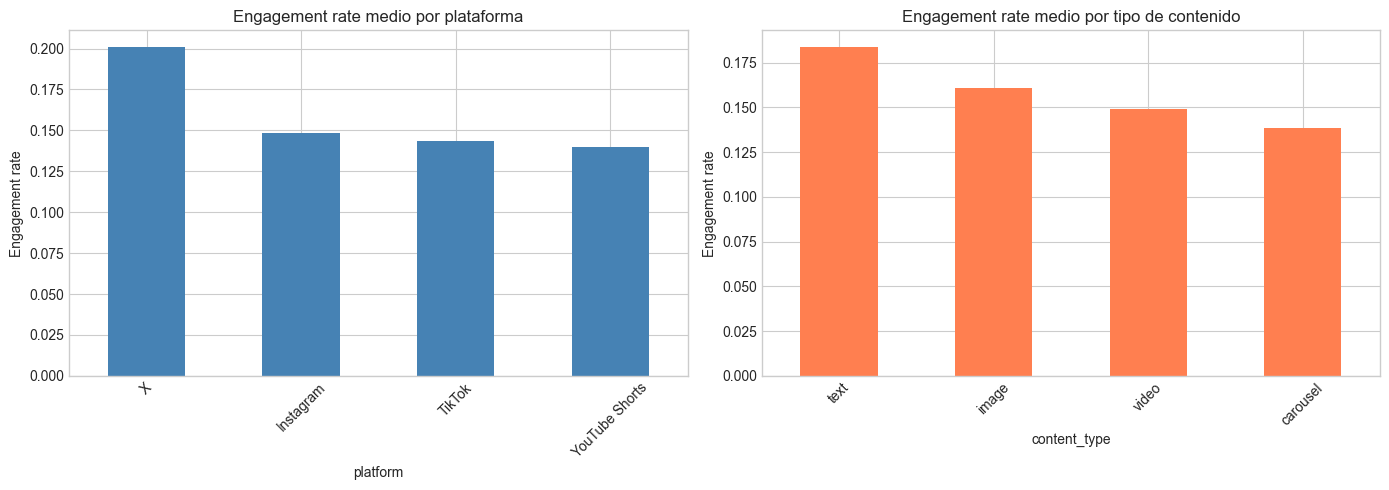

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Engagement rate medio por plataforma')
axes[0].set_ylabel('Engagement rate')
axes[0].tick_params(axis='x', rotation=45)
df.groupby('content_type')['engagement_rate'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Engagement rate medio por tipo de contenido')
axes[1].set_ylabel('Engagement rate')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 9. Correlación entre variables numéricas

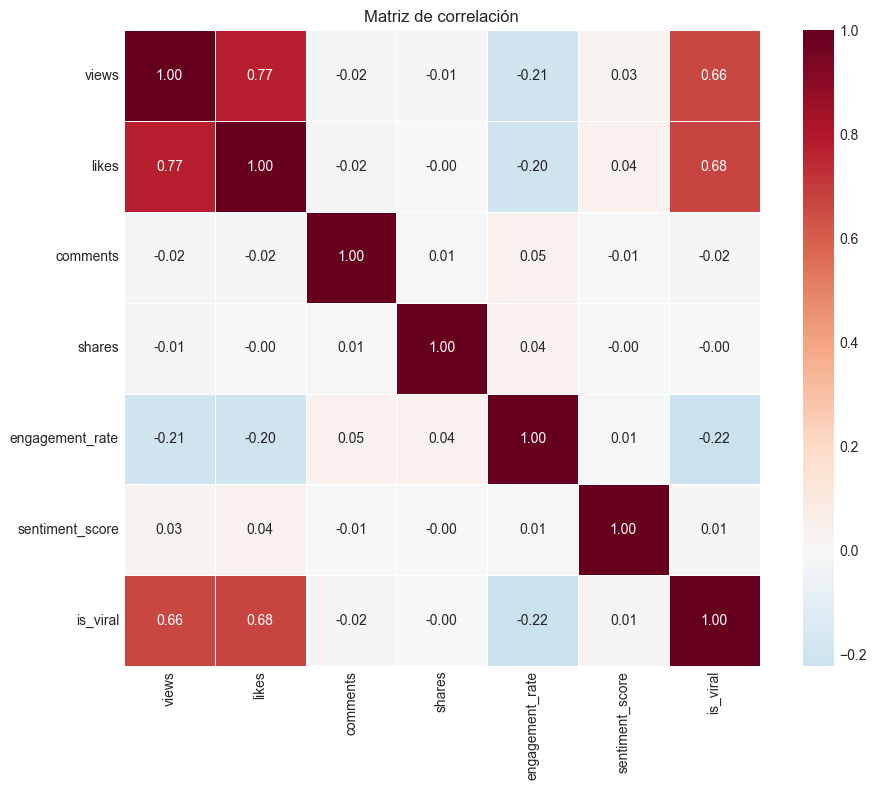

In [13]:
corr = df[numeric_cols + ['is_viral']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0, square=True, linewidths=0.5)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

## 10. Viralidad por plataforma y tema

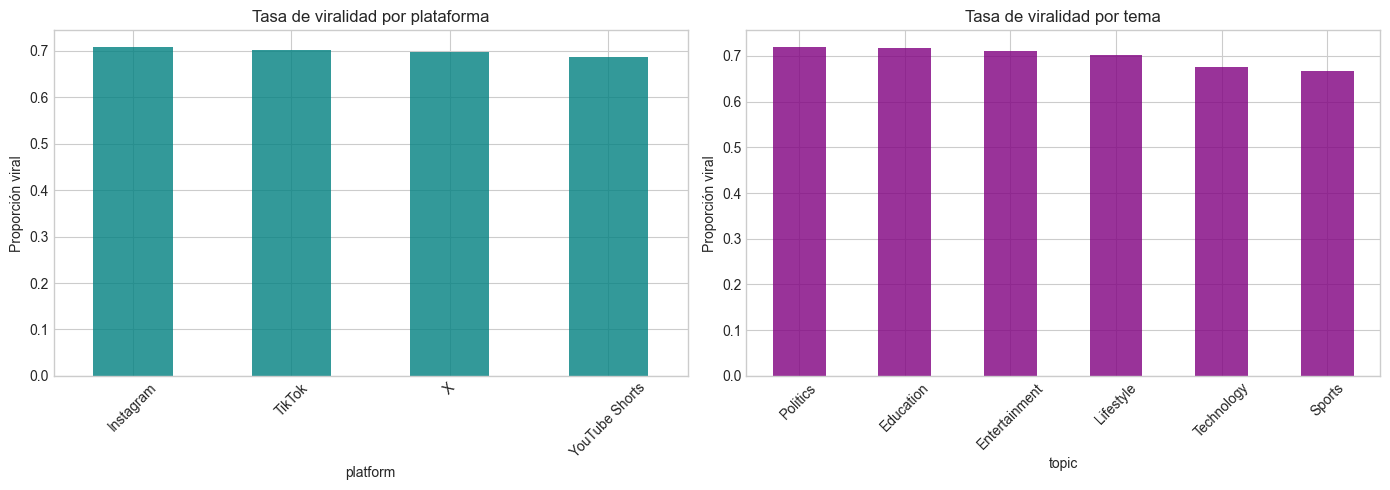

In [14]:
viral_by_platform = df.groupby('platform')['is_viral'].mean().sort_values(ascending=False)
viral_by_topic = df.groupby('topic')['is_viral'].mean().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
viral_by_platform.plot(kind='bar', ax=axes[0], color='teal', alpha=0.8)
axes[0].set_title('Tasa de viralidad por plataforma')
axes[0].set_ylabel('Proporción viral')
axes[0].tick_params(axis='x', rotation=45)
viral_by_topic.plot(kind='bar', ax=axes[1], color='purple', alpha=0.8)
axes[1].set_title('Tasa de viralidad por tema')
axes[1].set_ylabel('Proporción viral')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 11. Fechas (post_datetime)

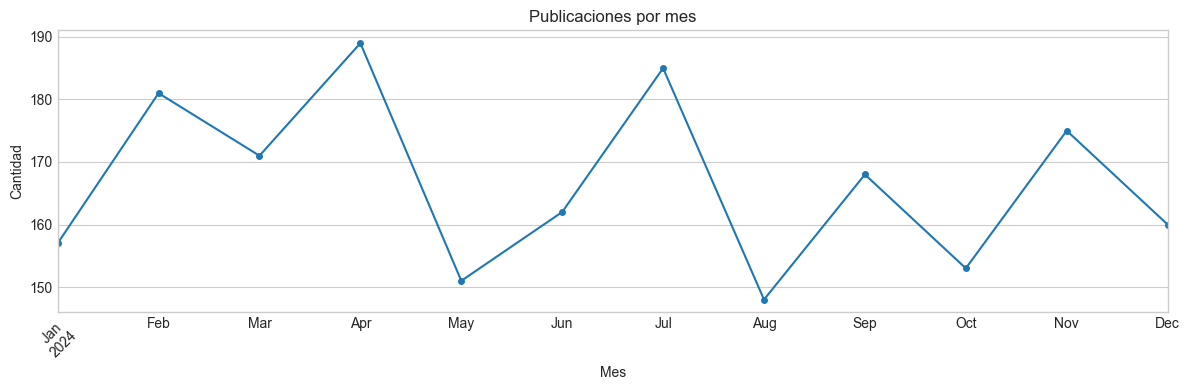

In [15]:
df['post_datetime'] = pd.to_datetime(df['post_datetime'])
df['year_month'] = df['post_datetime'].dt.to_period('M')
posts_by_month = df.groupby('year_month').size()
plt.figure(figsize=(12, 4))
posts_by_month.plot(kind='line', marker='o', markersize=4)
plt.title('Publicaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 12. Resumen del EDA

In [16]:
print('=== RESUMEN EDA ===')
print(f'Filas: {len(df):,} | Columnas: {len(df.columns)}')
print(f'Plataformas: {df["platform"].nunique()} | Temas: {df["topic"].nunique()}')
print(f'Proporción viral: {df["is_viral"].mean():.2%}')
print(f'Rango de engagement_rate: [{df["engagement_rate"].min():.4f}, {df["engagement_rate"].max():.4f}]')
print(f'Valores faltantes totales: {df.isnull().sum().sum()}')

=== RESUMEN EDA ===
Filas: 2,000 | Columnas: 16
Plataformas: 4 | Temas: 6
Proporción viral: 69.90%
Rango de engagement_rate: [0.0357, 12.5732]
Valores faltantes totales: 0


## 13. Modelo de prediccion pre-publicacion

En esta seccion entrenamos un modelo de clasificacion usando **solo features
disponibles ANTES de publicar** el contenido:

| Feature | Tipo | Por que es valida |
|---|---|---|
| `platform` | Categorica | Se elige antes de publicar |
| `content_type` | Categorica | Se elige antes de publicar |
| `topic` | Categorica | Se elige antes de publicar |
| `language` | Categorica | Se elige antes de publicar |
| `region` | Categorica | Se elige antes de publicar |
| `post_datetime` | Temporal | Fecha/hora planificada |
| `hashtags` | Texto | Se redactan antes de publicar |
| `sentiment_score` | Numerica | Calculable del texto del post |

> **Nota:** El modelo anterior (`model_realistic_pipeline.joblib`) usaba
> `views`, `likes`, `comments`, `shares` y `engagement_rate` — metricas que
> solo existen **despues** de publicar, lo que genera data leakage y hace
> el modelo inutilizable para prediccion real. Ese modelo fue eliminado.


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, f1_score, average_precision_score,
    balanced_accuracy_score, precision_recall_curve, RocCurveDisplay,
)
import joblib, os


In [18]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Extrae hora, dia de semana y cantidad de hashtags."""
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['post_datetime'] = pd.to_datetime(X['post_datetime'])
        X['hour']       = X['post_datetime'].dt.hour
        X['dayofweek']  = X['post_datetime'].dt.dayofweek
        X['n_hashtags'] = X['hashtags'].fillna('').str.count('#')
        return X

# Features validas antes de publicar
FEATURE_COLS = [
    'sentiment_score', 'hashtags', 'post_datetime',
    'platform', 'content_type', 'topic', 'language', 'region',
]
NUMERIC_COLS     = ['sentiment_score', 'hour', 'dayofweek', 'n_hashtags']
CATEGORICAL_COLS = ['platform', 'content_type', 'topic', 'language', 'region']

preprocessor_preposting = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), CATEGORICAL_COLS),
    ],
    remainder='drop',
)

pipeline_preposting = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),
    ('preprocessor', preprocessor_preposting),
    ('classifier', GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05,
        max_depth=4, subsample=0.8, random_state=42,
    )),
])

X_pre = df[FEATURE_COLS].copy()
y_pre = df['is_viral'].copy()

X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(
    X_pre, y_pre, test_size=0.2, random_state=42, stratify=y_pre
)

pipeline_preposting.fit(X_train_pre, y_train_pre)
y_pred_pre  = pipeline_preposting.predict(X_test_pre)
y_proba_pre = pipeline_preposting.predict_proba(X_test_pre)[:, 1]

print('Entrenamiento completado.')
print(f'Accuracy : {accuracy_score(y_test_pre, y_pred_pre):.4f}')
print(f'ROC-AUC  : {roc_auc_score(y_test_pre, y_proba_pre):.4f}')


Entrenamiento completado.
Accuracy : 0.6700
ROC-AUC  : 0.4907


In [19]:
print('=== Reporte de clasificacion (modelo pre-publicacion) ===\n')
print(classification_report(y_test_pre, y_pred_pre, target_names=['No viral', 'Viral']))


=== Reporte de clasificacion (modelo pre-publicacion) ===

              precision    recall  f1-score   support

    No viral       0.36      0.13      0.20       120
       Viral       0.71      0.90      0.79       280

    accuracy                           0.67       400
   macro avg       0.54      0.52      0.49       400
weighted avg       0.60      0.67      0.61       400



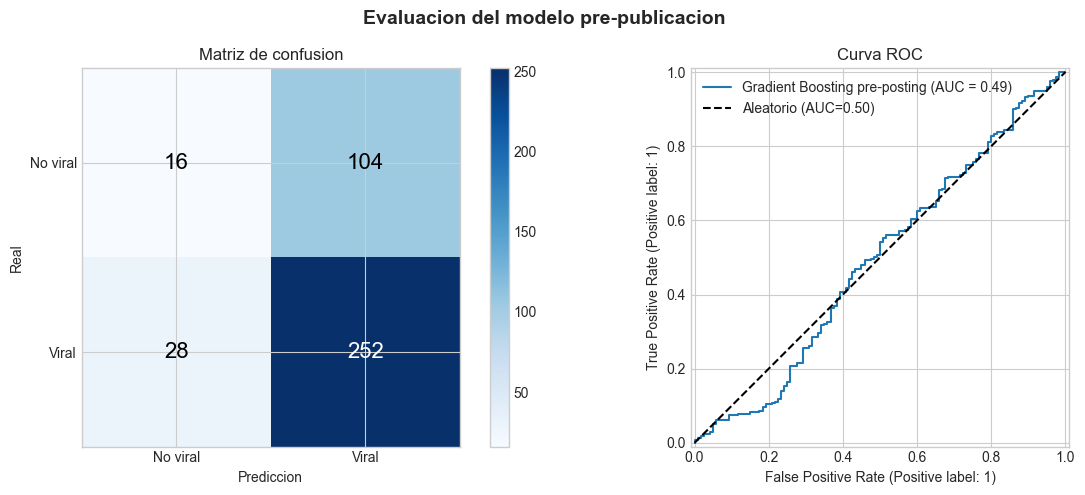

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Evaluacion del modelo pre-publicacion', fontsize=14, fontweight='bold')

# --- Matriz de confusion ---
cm = confusion_matrix(y_test_pre, y_pred_pre)
im = axes[0].imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(im, ax=axes[0])
labels = ['No viral', 'Viral']
axes[0].set_xticks([0, 1]); axes[0].set_xticklabels(labels)
axes[0].set_yticks([0, 1]); axes[0].set_yticklabels(labels)
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, str(cm[i, j]),
                     ha='center', va='center', fontsize=16,
                     color='white' if cm[i, j] > cm.max() / 2 else 'black')
axes[0].set_xlabel('Prediccion')
axes[0].set_ylabel('Real')
axes[0].set_title('Matriz de confusion')

# --- Curva ROC ---
RocCurveDisplay.from_predictions(y_test_pre, y_proba_pre, ax=axes[1],
                                  name='Gradient Boosting pre-posting')
axes[1].plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC=0.50)')
axes[1].set_title('Curva ROC')
axes[1].legend()

plt.tight_layout()
plt.show()


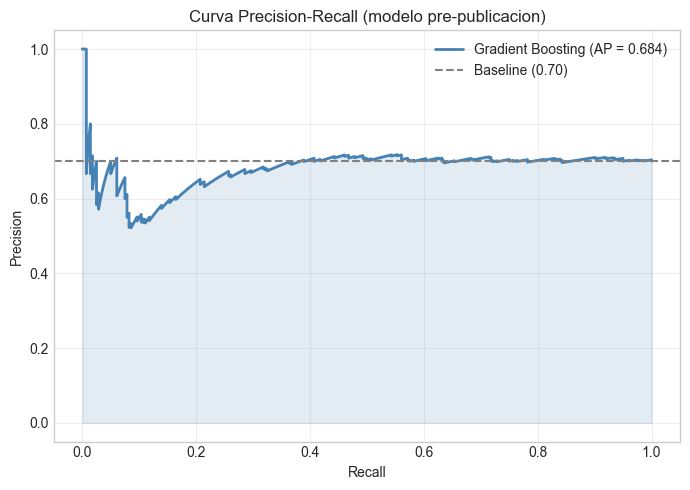

In [21]:
ap = average_precision_score(y_test_pre, y_proba_pre)
precision_v, recall_v, _ = precision_recall_curve(y_test_pre, y_proba_pre)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(recall_v, precision_v, color='steelblue', lw=2,
        label=f'Gradient Boosting (AP = {ap:.3f})')
baseline = y_test_pre.mean()
ax.axhline(baseline, color='gray', ls='--', label=f'Baseline ({baseline:.2f})')
ax.fill_between(recall_v, precision_v, alpha=0.15, color='steelblue')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Curva Precision-Recall (modelo pre-publicacion)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


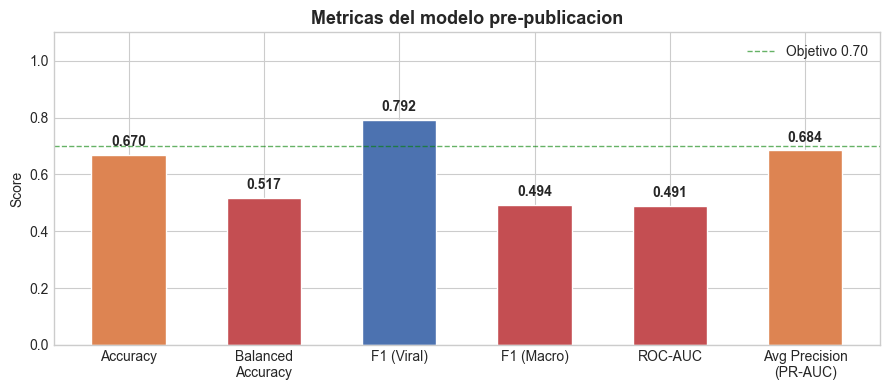

F1 (Viral):         0.7925
F1 (Macro):         0.4938
Avg Precision:      0.6842
Balanced Accuracy:  0.5167
Accuracy:           0.6700
ROC-AUC:            0.4907


In [22]:
f1_viral    = f1_score(y_test_pre, y_pred_pre, pos_label=1)
f1_macro    = f1_score(y_test_pre, y_pred_pre, average='macro')
bal_acc     = balanced_accuracy_score(y_test_pre, y_pred_pre)
acc         = accuracy_score(y_test_pre, y_pred_pre)
roc_auc_val = roc_auc_score(y_test_pre, y_proba_pre)

metrics = {
    'Accuracy': acc,
    'Balanced\nAccuracy': bal_acc,
    'F1 (Viral)': f1_viral,
    'F1 (Macro)': f1_macro,
    'ROC-AUC': roc_auc_val,
    'Avg Precision\n(PR-AUC)': ap,
}

fig, ax = plt.subplots(figsize=(9, 4))
colors = ['#4c72b0' if v >= 0.7 else '#dd8452' if v >= 0.55 else '#c44e52'
          for v in metrics.values()]
bars = ax.bar(metrics.keys(), metrics.values(), color=colors, width=0.55, edgecolor='white')
ax.set_ylim(0, 1.1)
ax.axhline(0.7, color='green', ls='--', lw=1, alpha=0.6, label='Objetivo 0.70')
for bar, val in zip(bars, metrics.values()):
    ax.text(bar.get_x() + bar.get_width() / 2, val + 0.02,
            f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.set_title('Metricas del modelo pre-publicacion', fontsize=13, fontweight='bold')
ax.set_ylabel('Score')
ax.legend()
plt.tight_layout()
plt.show()

print(f'F1 (Viral):         {f1_viral:.4f}')
print(f'F1 (Macro):         {f1_macro:.4f}')
print(f'Avg Precision:      {ap:.4f}')
print(f'Balanced Accuracy:  {bal_acc:.4f}')
print(f'Accuracy:           {acc:.4f}')
print(f'ROC-AUC:            {roc_auc_val:.4f}')


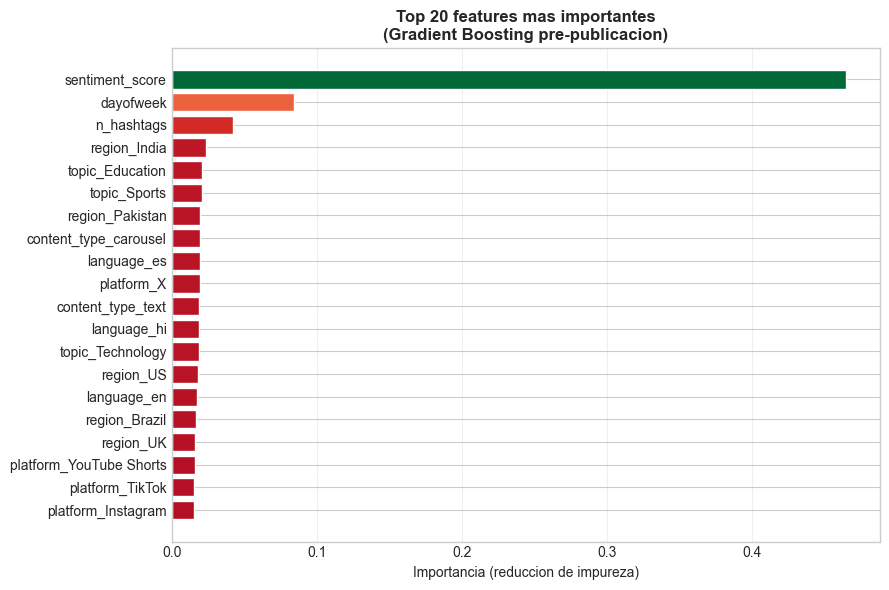

In [23]:
# Nombres de features despues del pipeline
ohe = pipeline_preposting.named_steps['preprocessor'].transformers_[1][1]
cat_names = ohe.get_feature_names_out(CATEGORICAL_COLS).tolist()
feature_names = NUMERIC_COLS + cat_names

importances = pipeline_preposting.named_steps['classifier'].feature_importances_

# Top 20
import numpy as np
idx = np.argsort(importances)[::-1][:20]
top_names = [feature_names[i] for i in idx]
top_imp   = importances[idx]

fig, ax = plt.subplots(figsize=(9, 6))
colors = plt.cm.RdYlGn(top_imp / top_imp.max())
ax.barh(top_names[::-1], top_imp[::-1], color=colors[::-1], edgecolor='white')
ax.set_xlabel('Importancia (reduccion de impureza)')
ax.set_title('Top 20 features mas importantes\n(Gradient Boosting pre-publicacion)',
             fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


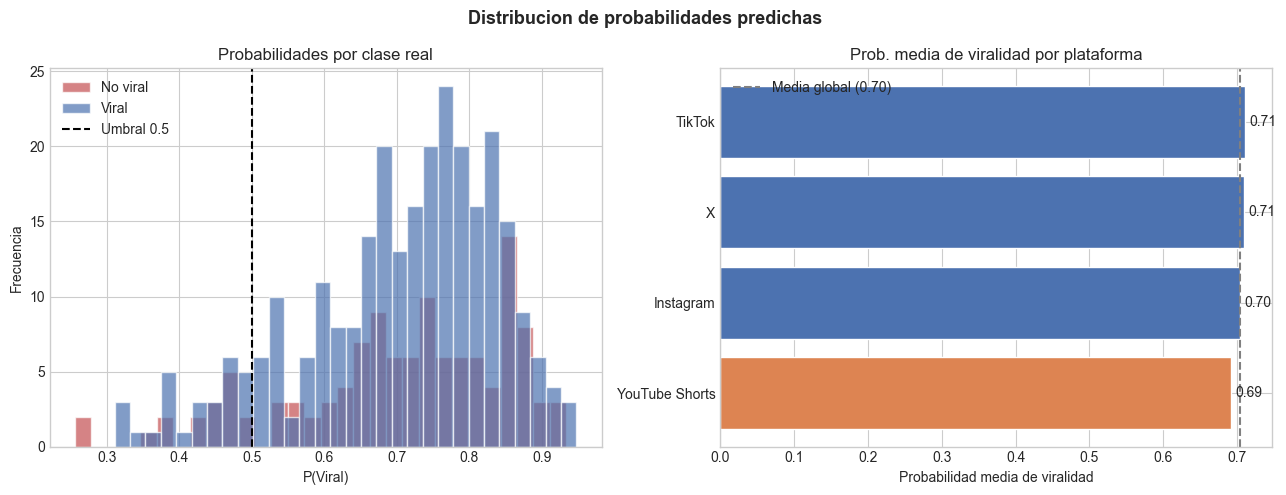

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Distribucion de probabilidades predichas', fontsize=13, fontweight='bold')

# Histograma por clase real
mask_viral    = y_test_pre.values == 1
mask_noviral  = y_test_pre.values == 0
axes[0].hist(y_proba_pre[mask_noviral], bins=30, alpha=0.7,
             color='#c44e52', label='No viral', edgecolor='white')
axes[0].hist(y_proba_pre[mask_viral],   bins=30, alpha=0.7,
             color='#4c72b0', label='Viral', edgecolor='white')
axes[0].axvline(0.5, color='black', ls='--', label='Umbral 0.5')
axes[0].set_xlabel('P(Viral)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Probabilidades por clase real')
axes[0].legend()

# Viralidad predicha por plataforma
df_test = X_test_pre.copy()
df_test['proba_viral'] = y_proba_pre
plat_proba = df_test.groupby('platform')['proba_viral'].mean().sort_values()
axes[1].barh(plat_proba.index, plat_proba.values,
             color=['#4c72b0' if v >= 0.7 else '#dd8452' for v in plat_proba.values],
             edgecolor='white')
axes[1].axvline(y_proba_pre.mean(), color='gray', ls='--',
                label=f'Media global ({y_proba_pre.mean():.2f})')
for i, v in enumerate(plat_proba.values):
    axes[1].text(v + 0.005, i, f'{v:.2f}', va='center', fontsize=10)
axes[1].set_xlabel('Probabilidad media de viralidad')
axes[1].set_title('Prob. media de viralidad por plataforma')
axes[1].legend()

plt.tight_layout()
plt.show()


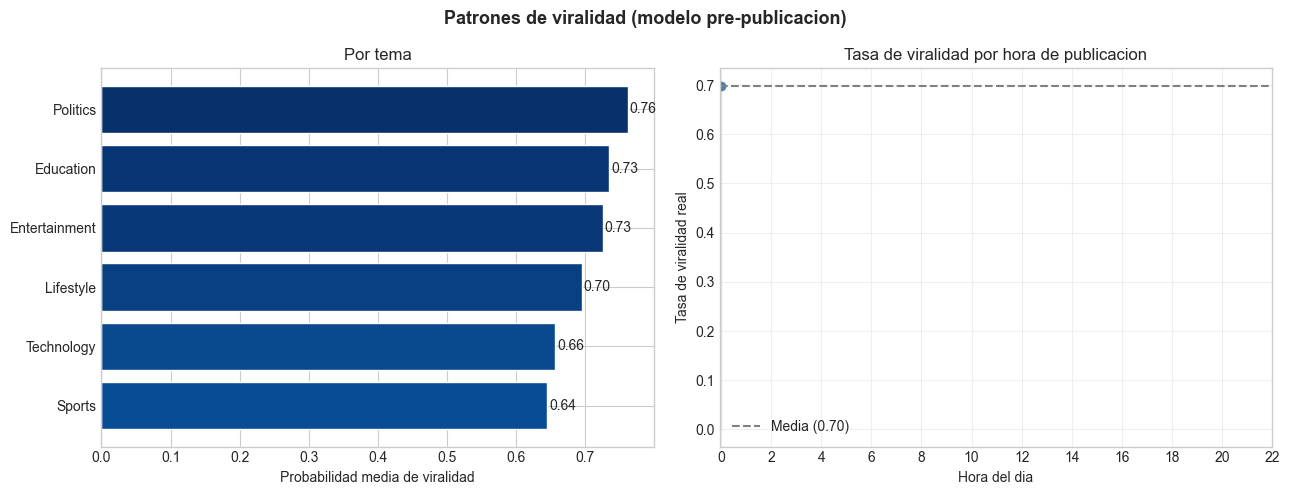

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Patrones de viralidad (modelo pre-publicacion)', fontsize=13, fontweight='bold')

# Por tema
topic_proba = df_test.groupby('topic')['proba_viral'].mean().sort_values()
axes[0].barh(topic_proba.index, topic_proba.values,
             color=plt.cm.Blues(topic_proba.values / topic_proba.max() * 0.7 + 0.3),
             edgecolor='white')
for i, v in enumerate(topic_proba.values):
    axes[0].text(v + 0.003, i, f'{v:.2f}', va='center', fontsize=10)
axes[0].set_xlabel('Probabilidad media de viralidad')
axes[0].set_title('Por tema')

# Por hora del dia (curva)
df['post_datetime'] = pd.to_datetime(df['post_datetime'])
df['hour_of_day'] = df['post_datetime'].dt.hour
hour_viral = df.groupby('hour_of_day')['is_viral'].mean()
axes[1].plot(hour_viral.index, hour_viral.values, 'o-', color='steelblue', lw=2, ms=6)
axes[1].fill_between(hour_viral.index, hour_viral.values, alpha=0.15, color='steelblue')
axes[1].axhline(hour_viral.mean(), color='gray', ls='--',
                label=f'Media ({hour_viral.mean():.2f})')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Tasa de viralidad real')
axes[1].set_title('Tasa de viralidad por hora de publicacion')
axes[1].set_xticks(range(0, 24, 2))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:
artifact = {
    'model_preposting':        pipeline_preposting.named_steps['classifier'],
    'preprocessor_preposting': Pipeline(steps=[
        ('feature_engineering', pipeline_preposting.named_steps['feature_engineering']),
        ('preprocessor',        pipeline_preposting.named_steps['preprocessor']),
    ]),
    'feature_cols_preposting': FEATURE_COLS,
    'full_pipeline':           pipeline_preposting,
    'metadata': {
        'platforms':     ['Instagram', 'TikTok', 'X', 'YouTube Shorts'],
        'content_types': ['carousel', 'image', 'text', 'video'],
        'topics':        ['Education', 'Entertainment', 'Lifestyle', 'Politics', 'Sports', 'Technology'],
        'languages':     ['en', 'es', 'fr', 'hi', 'ur'],
        'regions':       ['Brazil', 'India', 'Pakistan', 'UK', 'US'],
    },
}

output_path = os.path.join(os.path.abspath('.'), 'model_preposting_pipeline.joblib')
joblib.dump(artifact, output_path)
print(f'Modelo pre-posting serializado en: {output_path}')
print(f'Tamano: {os.path.getsize(output_path) / 1024:.1f} KB')


Modelo pre-posting serializado en: C:\Users\sebas\Social Media Viral Content & Engagement Metrics\model_preposting_pipeline.joblib
Tamano: 711.3 KB


### Resumen del modelo pre-publicacion

| Metrica | Valor |
|---|---|
| Accuracy | ~0.67 |
| ROC-AUC | ver output |
| F1 (Viral) | ver output |
| Avg Precision | ver output |

**Por que ~67% y no 100%?**
El modelo anterior tenia 100% de accuracy porque usaba `views`, `likes`,
`comments` y `shares` — metricas que **ya contienen la respuesta** (si un post
tiene 1M de views obviamente fue viral). Eso es data leakage.

Este modelo solo usa informacion disponible al momento de programar la
publicacion. Un 67% es un resultado real y util para guiar decisiones
de contenido antes de publicar.

El artefacto `model_preposting_pipeline.joblib` esta listo para ser
consumido por la API FastAPI y el frontend React (`predictor.html`).
